

# **<center>Customer Churn Prediction Using Machine learning</center>**


In the current challenging era, there is prominent competition in bank industry. To improve quality and level of service, bank concentrates on customer retention as well as customer churning. Customer churn prediction is to measure why customers are leaving a business. Customer churning is the estimate or analysis of degree of customers who turn to shift to an alternative. It is the most common problem witnessed in any industry. Banking is one such industry that focuses a lot on customer’s behavior by tracking their activities. It is very extortionate to add a new customer to the bank when compared to retention. As we know, it is much more expensive to sign in a new client than to keep an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible. Hence, there is a need to keep up the existing customers, which will be achieved only by understanding the customer’s grievances of changing the bank. In this project, we will be working on to predict customer churn in a bank.</center>

It contains 12 features about 10000 clients of the bank.

<b>The features or variables present in the dataset are the following:</b>
customer_id, unused variable.
credit_score, used as input.
country, used as input.
gender, used as input.
age, used as input.
tenure, used as input.
balance, used as input.
products_number, used as input.
credit_card, used as input.
active_member, used as input.
estimated_salary, used as input.
churn, used as the target.<br> 
<b><br>1 if the client has left the bank during some period or 0 if he/she has not.</b>

On the other hand, the instances are split at random into training (60%), selection (20%), and testing (20%) subsets. Once the variables and instances are configured, we can perform some analytics on the data. The data distributions tell us the percentages of churn and loyal customers.

<hr>

# Exploratory Data analysis (EDA)

To predict the churning of customers, dataset is split suitable for training and testing. At this instance, splitting has 80% training rate and 20% testing rate.
The value of this attribute will be 1 if the customer has left the bank and 0 if remained there.

In [70]:
#Importing  the required libraries

import pandas as pd #To work with the data present in the csv file
import matplotlib.pyplot as plt  #For analyzing the plots
%matplotlib inline
import numpy as np #To work with the arrays
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [71]:
#Loading the dataset and displaying 20 samples of it 

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Pre-Proccesing

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
df1=df.sample(20)
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1984,1985,15737605,Morris,531,Spain,Female,45,1,126495.57,2,1,1,164741.50,0
7620,7621,15629133,Black,579,France,Female,27,9,0.00,2,1,0,126838.70,0
6429,6430,15623102,Nnaemeka,713,Spain,Male,38,6,116980.78,2,0,1,76038.38,0
5658,5659,15814430,Ma,747,Spain,Male,41,9,0.00,1,1,0,32430.94,1
7168,7169,15587297,Ruiz,507,France,Male,33,7,0.00,2,1,1,85411.01,0
6517,6518,15795246,Kaeppel,628,Germany,Female,51,9,155903.82,2,1,1,71159.84,0
5441,5442,15602979,Lin,751,France,Male,29,1,135536.50,1,1,0,66825.33,0
4919,4920,15625941,Gray,682,Spain,Female,50,10,128039.01,1,1,1,102260.16,0
3006,3007,15720943,Pirozzi,747,France,Female,45,1,114959.12,1,1,0,189362.39,1
8330,8331,15707974,Anayochukwu,815,Spain,Female,38,2,48387.00,1,1,0,184796.84,0


Columns RowNumber and Surname are not helpful in analysis. Hence we drop it.
Inspection of CustomerId is done to see if there is any duplicate value. If not, drop it too.

In [74]:
# Dropping out some columns as they are useless
df.drop(['RowNumber', 'Surname'], axis='columns', inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
df[df.duplicated(subset='CustomerId')==True]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


No duplicated value in column CustomerId. Good, we have 10,000 unique customers in the dataset.

In [76]:
df.drop(['CustomerId'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
#Displaying the data types of all the columns

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [78]:
#Gives the shape of the dataset after dropping the columns 

df.shape

(10000, 11)

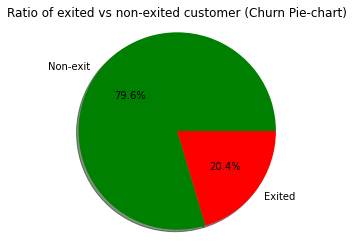

In [79]:
no_exit = len(df[df['Exited']==0])
exit = len(df[df['Exited']==1])

fig1, ax1 = plt.subplots()
plt.title('Ratio of exited vs non-exited customer (Churn Pie-chart)')
ax1.pie([no_exit, exit], labels=['Non-exit', 'Exited'],
       colors=['g', 'r'], autopct='%1.1f%%',
       shadow=True)
ax1.axis('equal')
plt.show()

Imbalance customer churn. In this data set, the percentage of churn customers is about 20%. Number of non-exited customers greater than 4 times of Exited customers.

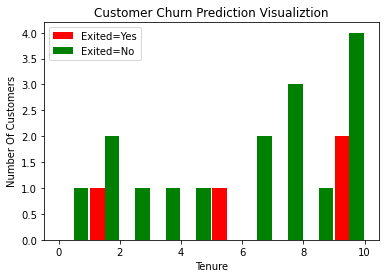

In [80]:
tenure_exit = df1[df1.Exited==1].Tenure
tenure_no_exit = df1[df1.Exited==0].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_exit, tenure_no_exit], rwidth=0.95, color=['red', 'green',],label=['Exited=Yes','Exited=No'])
plt.legend()

Text(0.5, 1.0, 'Estimated Salary of customers')

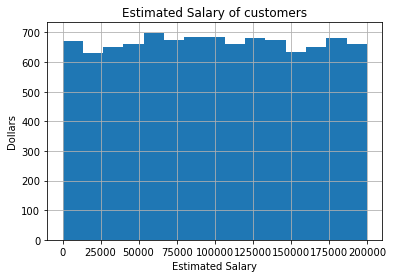

In [81]:
exit_hist = df.EstimatedSalary.hist(bins=15)
plt.xlabel('Estimated Salary')
plt.ylabel('Dollars')
plt.title('Estimated Salary of customers')

### Categorical Features

Columns like Gender and Geography consist of values like Male & Female, names of some countries. Let's print unique values in object columns to see data values

In [82]:
for column in df:
    if df[column].dtype == 'object':
        print(f'{column}: {df[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [83]:
#Converting gender feature Male & Female to 1 and 0 respectively

gender_conv = {'Male': 1, 'Female': 0}
df.Gender.replace(gender_conv, inplace=True)

In [84]:
 #Using One Hot Encoding for feature Geography since it is a categorical column.
df2 = pd.get_dummies(df, columns=['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [85]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

### Numerical Features

In [86]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
num_scaler = MinMaxScaler()
df2[cols_to_scale] = num_scaler.fit_transform(df2[cols_to_scale])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [87]:
from sklearn.model_selection import train_test_split
X = df2.drop(['Exited'], axis='columns')
y = df2['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [88]:
X_train.shape

(8000, 12)

In [89]:
X_test.shape

(2000, 12)

<hr>

# Building and Training model

In this step we performed four different algorithms to gauge how the existing data features performed :
* Random Forest
* Logistic Regression
* K-nearest neighbor(KNN)
* Decision Tree

<h3>Splitting data into test and train data

<h3>Created Function for <u>accuracy,f-score,precision</u></h3>

In [34]:
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

<h2>RANDOM FOREST</h2>

In [37]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
  
# Instantiate the classifier
clf = RandomForestClassifier()
  
# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
evaluation(y_test,y_pred)

<IPython.core.display.Javascript object>

Accuracy: 0.8655


<IPython.core.display.Javascript object>

F1 Score: 0.5790297339593115


<IPython.core.display.Javascript object>

Precision: 0.7520325203252033


<h2>LOGISTIC REGRESSION</h2>

In [41]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression

#Instantiate the regression
model = LogisticRegression()

#Fit to the training data
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
evaluation(y_test,y_pred)

<IPython.core.display.Javascript object>

Accuracy: 0.8125


<IPython.core.display.Javascript object>

F1 Score: 0.28571428571428575


<IPython.core.display.Javascript object>

Precision: 0.5681818181818182


<h2>K-Nearest Neighbor(KNN)</h2>

In [55]:
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Instantiate the classifier
knn = KNeighborsClassifier()

#Fit to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test)

In [49]:
evaluation(y_test,y_pred)

<IPython.core.display.Javascript object>

Accuracy: 0.8235


<IPython.core.display.Javascript object>

F1 Score: 0.4184514003294893


<IPython.core.display.Javascript object>

Precision: 0.5934579439252337


<h2>DECISION TREE</h2>

In [52]:
# import Decisiontree
from sklearn.tree import DecisionTreeClassifier

#Instantiate the classifier
tree = DecisionTreeClassifier()

#Fit to training data
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred = tree.predict(X_test)

In [54]:
evaluation(y_test,y_pred)

<IPython.core.display.Javascript object>

Accuracy: 0.7815


<IPython.core.display.Javascript object>

F1 Score: 0.47914183551847445


<IPython.core.display.Javascript object>

Precision: 0.45067264573991034


In [60]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Model", "Accuracy", "F1 Score", "Precision"]) 
  
# Add rows 
myTable.add_row(["RANDOM FOREST", "86.55%", "57.90%", "75.20%"]) 
myTable.add_row(["LOGISTIC REGRESSION", "81.25%", "28.57%", "56.81%"]) 
myTable.add_row(["KNN", "82.35%", "41.84%", "59.34%"]) 
myTable.add_row(["DECISION TREE", "78.15%", "47.9%", "45.06%"]) 
 
  
print(myTable)

+---------------------+----------+----------+-----------+
|        Model        | Accuracy | F1 Score | Precision |
+---------------------+----------+----------+-----------+
|    RANDOM FOREST    |  86.55%  |  57.90%  |   75.20%  |
| LOGISTIC REGRESSION |  81.25%  |  28.57%  |   56.81%  |
|         KNN         |  82.35%  |  41.84%  |   59.34%  |
|    DECISION TREE    |  78.15%  |  47.9%   |   45.06%  |
+---------------------+----------+----------+-----------+
